In [15]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from skimage.io import imread,imshow,imsave

from numpy.fft import fft,ifft,fft2,ifft2,fftshift,ifftshift

def fourier2(im):
    return fftshift(fft2(im))

def ifourier2(f):
    return ifft2(ifftshift(f)).real

def fourier(s):
    return fftshift(fft(s))

def ifourier(f):
    return ifft(ifftshift(f)).real

def ampl(f):
    return np.sqrt(f.real**2 + f.imag**2)

def phase(f):
    return np.arctan2(f.imag, f.real)

<IPython.core.display.Javascript object>


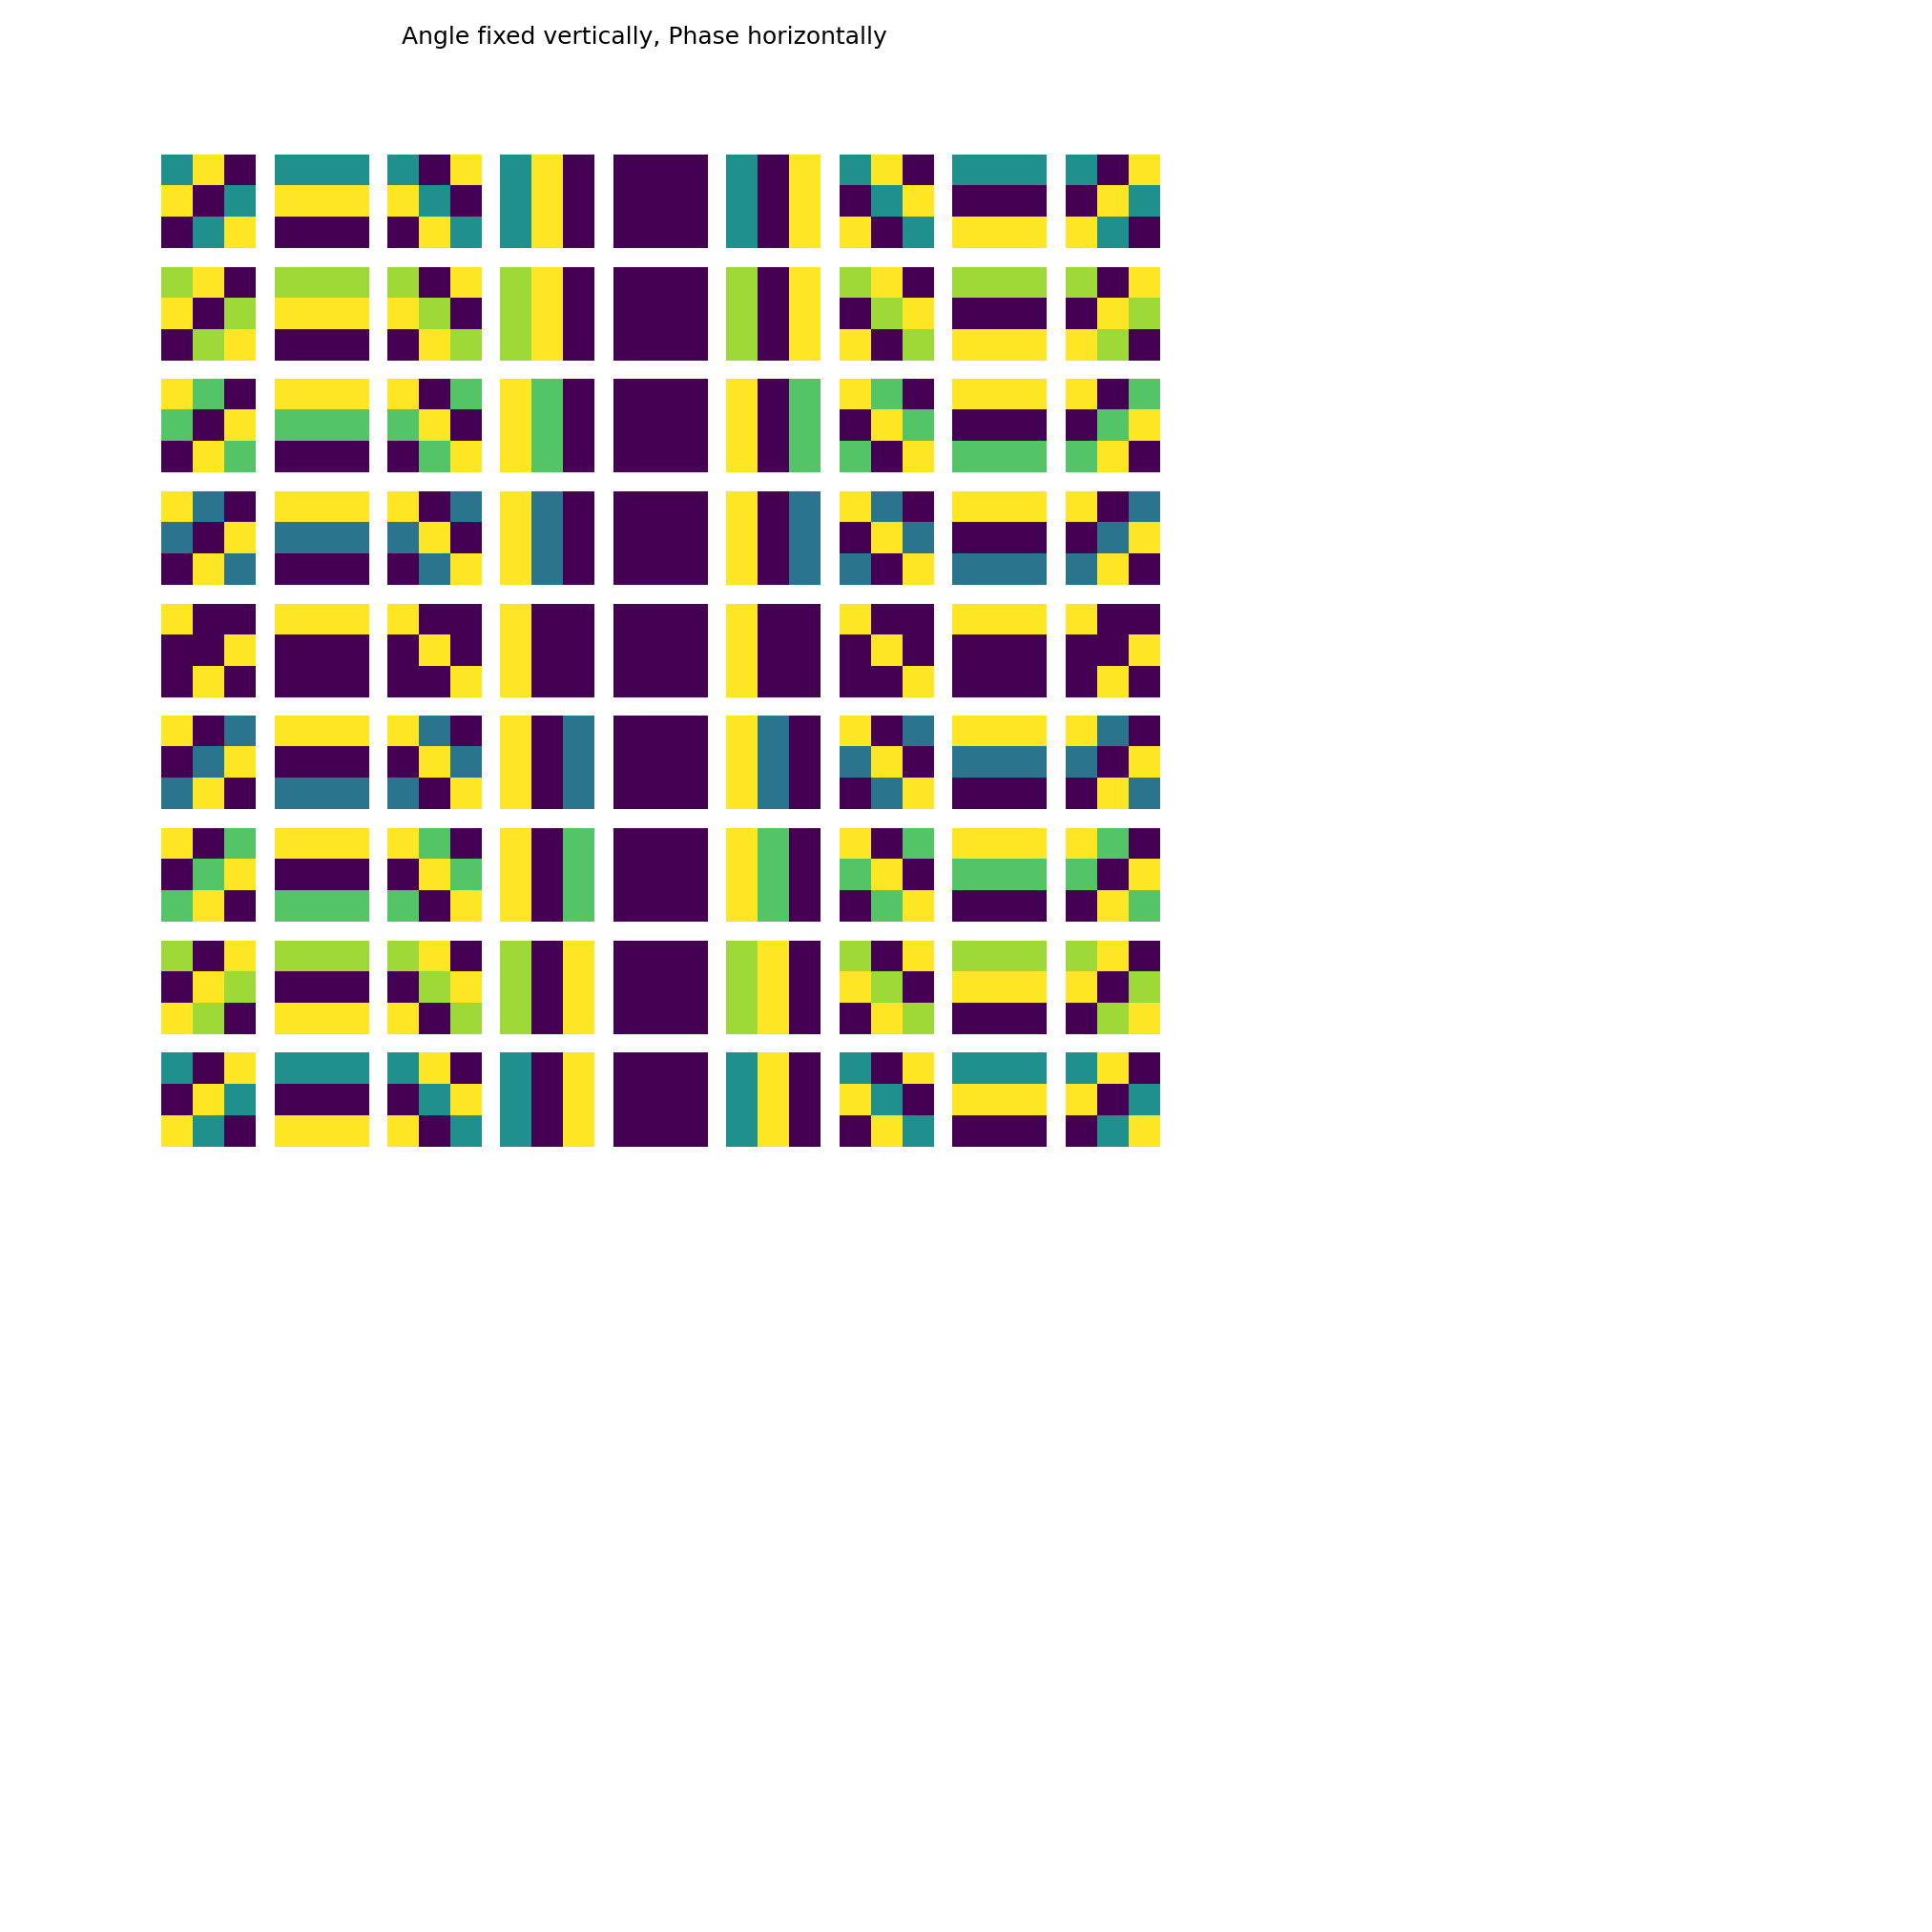

In [85]:

angles = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2],[2,0],[2,1],[2,2]] # Grid Coordinates in fourier domain
sample_size = len(angles)
phases = np.linspace(0,np.pi, sample_size) # to make a square, sample same amount as angles
figure, axes = plt.subplots(nrows=sample_size, ncols=sample_size,figsize=(9,9))
figure.suptitle('Angle fixed vertically, Phase horizontally', fontsize=12)
# figure.set_ylabel('ylabel', fontsize='medium') 

images = []
for row, phase in enumerate(phases):
    for col, angle in enumerate(angles):
        frequency = np.zeros((3,3)) + 0j 
        X = np.random.randint(0,255,size=(3,3))
        
        frequency[angle[0],angle[1]] = np.sin(phase) + np.cos(phase)*1j
#         axes[row,col].imshow(ampl(frequency), interpolation='none', cmap='gray')
        im = ifourier2(frequency).real
        images.append(im)
        axes[row,col].imshow(im,cmap='viridis')
        axes[row,col].axis('off')